In [2]:
import numpy as np
np.__version__

'1.17.4'

In [3]:
import matplotlib.pyplot as plt

In [4]:
np.random.seed(777)

# How to generate rewards

The true reward corresponding to each action ( Pulling a lever arm in this case ) is sampled from a normal distribution with mean 0 and variance 1

In [5]:
action_indices = np.arange(0,10)

In [6]:
# Sample true rewards from  normal ( not uniform ) distibution
mu = 0
sigma = 1
shape = (10)
true_rewards = np.random.normal(mu,sigma,shape)

In [7]:
true_rewards

array([-0.46820879, -0.82282485, -0.0653801 , -0.71336192,  0.90635089,
        0.76623673,  0.82605407, -1.32368279, -1.75244452,  1.00244907])

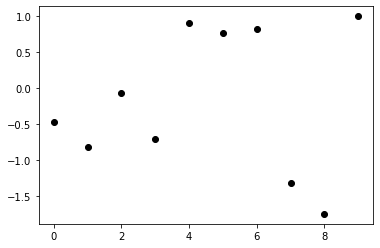

In [8]:
plt.plot(action_indices, true_rewards,'o', color='black')

# 10-armed testbed visualization

### From Figure 2.1: Reinforcement Learning: An Introduction second edition

An example bandit problem from the 10-armed testbed. The true value $q_{*}(a)$ of
each of the ten actions are selected according to a normal distribution with mean zero and unit
variance, and then the actual rewards are selected according to a mean $q_{*}(a)$ unit variance
normal distribution, as suggested by these gray distributions.

In [9]:
# At runtime we will select rewards with true rewards as mean and unit variance normal distribution
# Lets Plot how it will look like
%time
runtime_rewards = np.array([ np.random.normal(true_reward,1,1000) for true_reward in true_rewards])

CPU times: user 1 µs, sys: 1 µs, total: 2 µs
Wall time: 3.34 µs


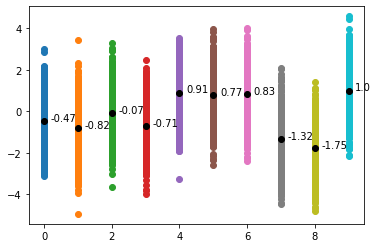

In [10]:
for index in action_indices :
    plt.scatter(np.full((1000),index),runtime_rewards[index])
    plt.text(index+0.2,true_rewards[index],str(round(true_rewards[index],2)))
plt.plot(action_indices, true_rewards,'o', color='black')
plt.show()

# Greedy vs $epsilon$-Greey Method

## Some points regarding our experiments
#### True Reward for action $a$ : $Q_{*}(a)$
#### Estimated Reward for action $a$ at time $t$ : $R_{t}(a)$
#### Reward computed using "sample-average of observed rewards" method for action $a$ at time $t$  : $Q_{t}(a)$

1. We produce 2000 different Bandit Problems in which reward corresponding to each action is sampled from a normal distribution with mean 0 and variance 1. These rewards are called true rewards. 
2. During runtime we do not show the true rewards to our agent. Rather each time an action is selected we sample a reward from a normal distribution with mean as true reward ( corresponding to that action of that bandit problem ) and vaiance as 1. Now suppose the same action has been previously taken $n-1$ times in the past and sum of those is $S_{n-1}$. Then reward given to the agent will be :

 $Q_{t}(a)$ = ( sum of rewards when $a$ taken prior to $t$ ) / ( number of times a taken prior to $t$ )
 
 $Q_{t}(a)$ =  ( $S_{n-1}$ + $R_{t}(a)$ ) / $n$
 
3. We keep this sum in  running_reward_sum [bandit_problem][action_index] and  number of times that action has been taken in action_count[bandit_problem][action_index]
 
4. We assume that each action in each bandit problem has been taken at least once and so the data structure action_count has each of its value initialized to 1. 
5. Rewards taken at step 0 is 0 and at step 1 is "mean of all rewards corresponding to each action in each bandit problem". i.e np.mean(initial_reward_estimates) where initial_reward_estimates =  np.random.normal(testbed,1)

In [11]:
# Produce a testbed of 2000 bandit problems
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
reward_estimates = np.zeros((n_bandit,n_lever))
action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
initial_reward_estimates =  np.random.normal(testbed,1)

In [12]:
running_reward_sum = np.copy(reward_estimates) # _per_action_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.1
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon: # Greedy Selection
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices ) # breaking ties randomly
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/n_bandit)

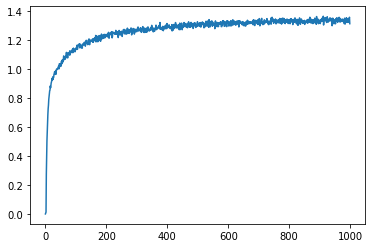

In [13]:
plt.plot(np.arange(steps),rewards)

In [16]:
running_reward_sum = np.copy(reward_estimates) # _per_pull_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.0
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon:
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices )
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/n_bandit)

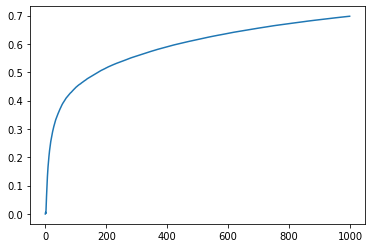

In [17]:
plt.plot(np.arange(steps),rewards)

In [18]:
running_reward_sum = np.copy(reward_estimates) # _per_pull_per_bandit

rewards = []
rewards.append(0) 
rewards.append(np.mean(initial_reward_estimates)) # step 1

epsilon = 0.01
for step in range(2,steps):
    reward_sum_over_all_bandits_per_step = 0
    for problem_index in range(n_bandit):  
        if np.random.random() > epsilon:
            maxval = np.amax(reward_estimates[problem_index])
            maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
            random_choice = np.random.choice( maxval_indices )
        else :
             random_choice = np.random.randint(n_lever)
        
        #print(str(problem_index),str(step),str(random_choice))
        running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
        action_count[problem_index][random_choice] += 1         
        avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
        reward_estimates[problem_index][random_choice] = avg_reward
        
        reward_sum_over_all_bandits_per_step += avg_reward
        
    rewards.append((reward_sum_over_all_bandits_per_step)/n_bandit)

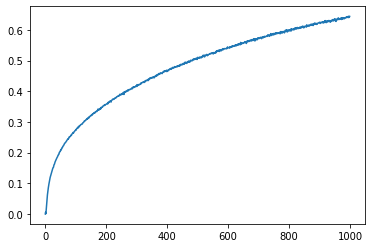

In [19]:
plt.plot(np.arange(steps),rewards)

## Lets eliminate the redundant code and pack common code in a function

In [20]:
def rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon):
    reward_estimates = np.zeros((n_bandit,n_lever))
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    running_reward_sum = np.copy(reward_estimates) # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0) 
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2,steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):  
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice( maxval_indices )
            else :
                 random_choice = np.random.randint(n_lever)

            #print(str(problem_index),str(step),str(random_choice))
            running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
            action_count[problem_index][random_choice] += 1         
            avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
            reward_estimates[problem_index][random_choice] = avg_reward

            reward_sum_over_all_bandits_per_step += avg_reward

        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
    return avg_rewards_per_step

In [28]:
np.random.seed(10)
n_bandit = 2000
n_lever = 10
steps = 1000

testbed = np.random.normal(0,1,(n_bandit,n_lever))
initial_reward_estimates =  np.random.normal(testbed,1)

## Without MultiProcessing

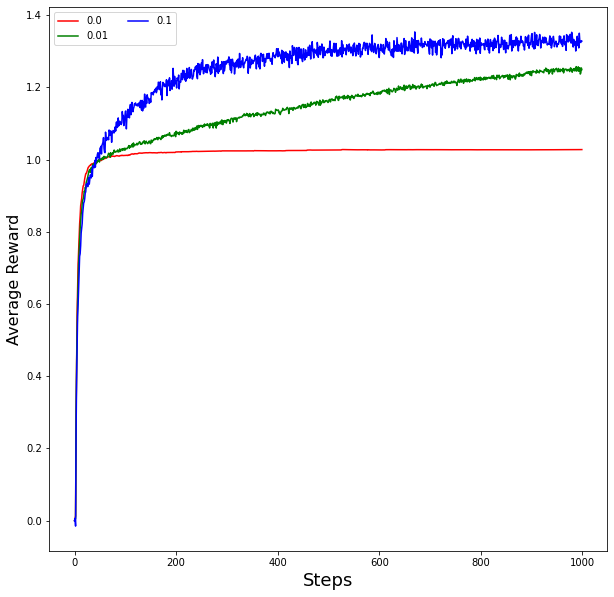

CPU times: user 2min 54s, sys: 1.25 s, total: 2min 55s
Wall time: 2min 53s


In [29]:
%%time
epsilon_list = [0.0,0.01,0.1]
color = ['g','r','b']

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index,eps in enumerate(epsilon_list):
    avg_rewards_per_step = rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, eps)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=eps, color=color_list[index])
    
plt.legend(loc=2, ncol=2)
plt.show()

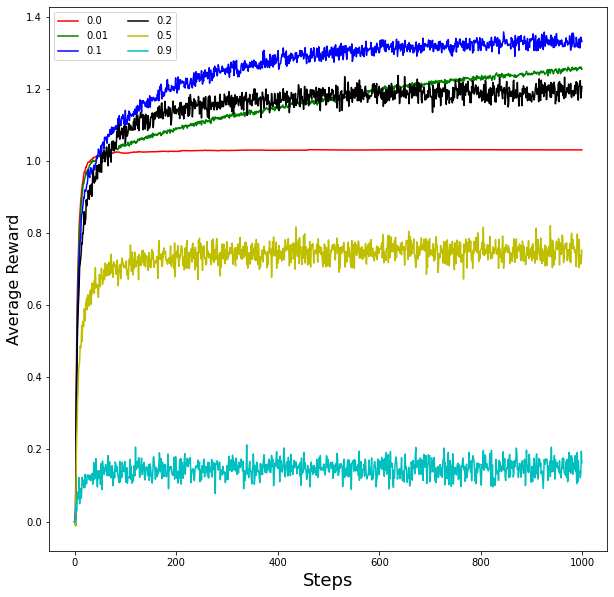

CPU times: user 5min 8s, sys: 2.74 s, total: 5min 11s
Wall time: 5min 7s


In [30]:
%%time
epsilon_list= [0.0, 0.01,0.1,0.2,0.5,0.9]
color_list = ['r', 'g', 'b', 'k', 'y','c']

plt.figure(figsize=(10,10))
plt.xlabel('Steps', fontsize=18)
plt.ylabel('Average Reward', fontsize=16)

for index,eps in enumerate(epsilon_list):
    avg_rewards_per_step = rewards_per_step(steps, n_bandit, n_lever, testbed, initial_reward_estimates, eps)
    plt.plot(np.arange(steps),avg_rewards_per_step,label=eps, color=color_list[index])
    
plt.legend(loc=2, ncol=2)
plt.show()

## With MultiProcessing

In [25]:
import multiprocessing


In [26]:
def rewards_per_step_mp(steps, n_bandit, n_lever, testbed, initial_reward_estimates, epsilon,global_reward_list):
    reward_estimates = np.zeros((n_bandit,n_lever))
    action_count = np.ones((n_bandit,n_lever))  # each lever is pulled atleast once
    running_reward_sum = np.copy(reward_estimates) # _per_pull_per_bandit

    avg_rewards_per_step = []
    avg_rewards_per_step.append(0) 
    avg_rewards_per_step.append(np.mean(initial_reward_estimates)) # step 1

    for step in range(2,steps):
        reward_sum_over_all_bandits_per_step = 0
        for problem_index in range(n_bandit):  
            if np.random.random() > epsilon:
                maxval = np.amax(reward_estimates[problem_index])
                maxval_indices = np.ravel(np.array(np.where(reward_estimates[problem_index] == maxval)))
                random_choice = np.random.choice( maxval_indices )
            else :
                 random_choice = np.random.randint(n_lever)

            #print(str(problem_index),str(step),str(random_choice))
            running_reward_sum[problem_index][random_choice] += np.random.normal(testbed[problem_index][random_choice],1)
            action_count[problem_index][random_choice] += 1         
            avg_reward = running_reward_sum[problem_index][random_choice] / action_count[problem_index][random_choice]
            reward_estimates[problem_index][random_choice] = avg_reward

            reward_sum_over_all_bandits_per_step += avg_reward

        avg_rewards_per_step.append((reward_sum_over_all_bandits_per_step)/n_bandit)
        
    global_reward_list.append(avg_rewards_per_step)
    return

### The order of appending
Carefully Observe the below code. Corresponding to each epsilon curve we have a color code.
But we can not exactly know the order in which threads corresponding to each epsilon will be returned.
and so if we use just one list to pass into each thread and try to append result of each thread to it, we do not exactly know the order in which the thread data was appended. This way the plotting will be ambiguous. So although we pass a separate list to each of the thread call but these lists are 
arranged in a desired order in our global_reward_list.

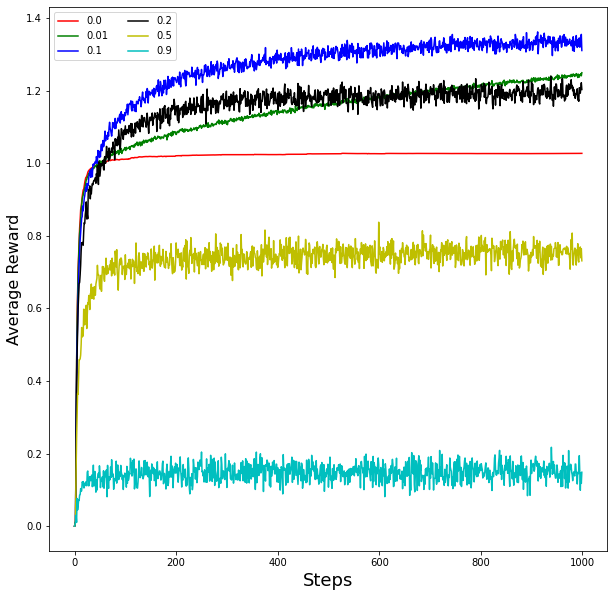

CPU times: user 177 ms, sys: 16.1 ms, total: 193 ms
Wall time: 1min 21s


In [27]:
%%time
with multiprocessing.Manager() as manager:
    global_reward_list = []
    mp_objects = []
    epsilon_list= [0.0, 0.01,0.1,0.2,0.5,0.9]
    color_list = ['r', 'g', 'b', 'k', 'y','c']
    for eps in epsilon_list:
        global_reward_list.append(manager.list())
        mp_objects.append(multiprocessing.Process(target=rewards_per_step_mp,args=(steps, n_bandit, n_lever, 
                                                                  testbed, initial_reward_estimates,
                                                                  eps,
                                                                global_reward_list[len(global_reward_list)-1])) )
    for index in range(len(mp_objects)):
        mp_objects[index].start()

    for index in range(len(mp_objects)):
        mp_objects[index].join()
    
    plt.figure(figsize=(10,10))
    plt.xlabel('Steps', fontsize=18)
    plt.ylabel('Average Reward', fontsize=16)
    for  index in range(len(mp_objects)):
        plt.plot(np.arange(steps),global_reward_list[index][0],label=epsilon_list[index], color=color_list[index])
    
    plt.legend(loc=2, ncol=2)
    
    plt.show()